# Task 1: Data Preparation


In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 15)

# Find in the current directory all the csv files
import glob, os
os.chdir(os.getcwd())
files = [file for file in glob.glob("*.csv")]

# Read each csv_file using pandas and merge them based on the first column containing indices
df = pd.read_csv(files[0], thousands=',', skipinitialspace=True)
for file in files[1:]:
    df = pd.merge(df, pd.read_csv(file, thousands=',', skipinitialspace=True))
df.drop(df.columns[0], axis=1, inplace=True)

# # Drop any observation thbat contains NaN or None
# df.dropna(inplace=True

Let's first check the rows that contain NaN or None values.

In [2]:
df[df.isna().any(axis=1)]

,Engine CC,Total,Price,Female,Manufacturer,Unknown,Fuel,Male,Power,Model,Transmission
23,NaN,NaN,NaN,NaN,Ford,NaN,NaN,NaN,NaN,Focus,NaN
32,NaN,NaN,NaN,NaN,Seat,NaN,NaN,NaN,NaN,Ibiza,NaN
54,NaN,NaN,NaN,NaN,Toyota,NaN,NaN,NaN,NaN,Aygo,NaN
65,NaN,NaN,NaN,NaN,Ford,NaN,NaN,NaN,NaN,NaN,NaN
75,1366.294118,NaN,NaN,NaN,NaN,NaN,NaN,41148.0,NaN,106,4.647059


There are no ways to recover these missing values. Therefore, it's best to drop them. We can assume that from now on, no row will contain missing values in the form of NaN.

In [3]:
df.dropna(inplace = True)

In [4]:
# Check whether there are anormal values for categorical features
categorical_features = list(df.select_dtypes(exclude=["number"]).columns)
for feature in categorical_features:
    print("Value counts for", feature)
    print(df[feature].value_counts(ascending=True))

Value counts for Manufacturer
MG             1
Daihatsu       1
Toyota         1
Dacia          2
Maserati       3
            ... 
Fiat         288
Audi         293
Toyota       308
Peugeot      312
Ford         355
Name: Manufacturer, Length: 55, dtype: int64
Value counts for Fuel
autometic       2
diasel          4
peatrol         5
automatic      35
diesel        777
petrol       5274
Name: Fuel, dtype: int64
Value counts for Model
504           1
Orlando       1
M135i         1
Paceman       1
Rapid         1
             ..
Cabriolet    26
2000         31
CLA          33
Range        40
Space        49
Name: Model, Length: 507, dtype: int64


As we can see above, <i>Manufacturer</i> contains values that have whitespace in them, namely MC, Daihatsu, Toyota. We also need to exercise care here not to regard normal any values whose counts are greater than 1, (e.g. Dacia). From a quick search on the Internet, Dacia is a Romanian car manufacturer. Now, we will remove whitespace from the values found in <i>Manufacturer</i>.

There are also typos in Fuel. We will address them afterwards.

Finally, for the last categorical feature, we will use data_description.txt as our data oracle and eliminate all the models not included in the file. 

In [5]:
# We can iterate through all the categorical features just in case values with whitespace are present in other features.
for feature in categorical_features:
    df[feature] = df[feature].str.extract('([A-Za-z]+)')
    print("Value counts for", feature)
    print(df[feature].value_counts(ascending=True))

Value counts for Manufacturer
Dacia         2
Maserati      3
Abarth        4
Ferrari      10
Bentley      10
           ... 
Fiat        288
Audi        293
Toyota      309
Peugeot     312
Ford        355
Name: Manufacturer, Length: 52, dtype: int64
Value counts for Fuel
autometic       2
diasel          4
peatrol         5
automatic      35
diesel        777
petrol       5274
Name: Fuel, dtype: int64
Value counts for Model
Orlando      1
Two          1
John         1
Rapid        1
Duster       1
          ... 
X           68
i          104
A          112
C          114
S          130
Name: Model, Length: 357, dtype: int64


In [6]:
df['Fuel'].replace(['autometic'], 'automatic', inplace=True)
df['Fuel'].replace(['diasel'], 'diesel', inplace=True)
df['Fuel'].replace(['peatrol'], 'petrol', inplace=True)
df['Fuel'].value_counts()

petrol       5279
diesel        781
automatic      37
Name: Fuel, dtype: int64

In [7]:
possible_models = ['Clio', '320i', 'Polo', '206', 'Mondeo', 'Micra', 'Civic', 'Ka+',
'Megane', 'Yaris', 'CLA', 'A4', 'Passat', 'A3', '307', '207',
'Xsara', 'Fabia', '118i', 'Freelander', 'C3', 'Corolla', '535i',
'Avensis', 'E', 'Scenic', 'Ibiza', 'Range', 'Qashqai+2', 'Octavia',
'500L', 'A', 'Almera', 'C4', 'C5', 'C6', 'Two', 'One', 'RAV4',
'RAV5', '9-3X', '107', 'Aygo', 'I10', 'I11', 'A6', 'Picanto',
'Note', 'Leon', 'XE', 'Fusion', 'Accord', 'MX-5', '6', 'C1',
'Swift', 'Galaxy', '308', '3', 'TT', 'Laguna', '2', 'Panda',
'Auris', '306', '106', 'V70', 'Saxo', 'Touran', 'Beetle', 'Rio',
'C-MAX', 'X5', 'Juke', 'Vitara', 'Ceed', '406', 'Getz', 'X-Trail',
'CLK', 'S40', '75', 'Berlingo', 'Alto', 'Primera', 'I20', 'SLK',
'S-MAX', 'ML', 'Sportage', '407', 'C2', 'I30', 'XF', 'A1', 'Colt',
'A5', 'S-Type', 'V50', 'Escort', 'XC90', 'V40', 'X3', 'Tiguan',
'B', 'Fortwo', 'Bora', '45', '911', 'XJ', 'Impreza', '09-May',
'Celica', 'Sharan', 'Santa', '208', 'S60', 'DS3', 'Modus', 'ZR',
'Voyager', 'Sorento', 'Z4', '2000', 'Up', 'Jimny', 'Matiz',
'Boxster', 'Wagon', '3008', '323', 'Puma', 'Stilo', 'Scirocco',
'XK', 'Altea', 'C30', 'Accent', 'Lupo', 'Sprinter', 'Ix35',
'Kangoo', '5', 'Jetta', 'Alhambra', 'Espace', 'Ignis', 'SX4',
'Carens', 'Q5', 'Partner', 'Yeti', 'Touareg', 'Seicento', 'Superb',
'Bravo', 'X1', 'Q7', '147', 'MR2', '740i', 'TF', 'S80', 'Fox',
'Twingo', 'Lancer', 'Doblo', 'Eos', 'M3', 'PT', 'Matrix', 'IQ',
'SLS', 'A2', 'Z3', 'C70', 'Roomster', 'Splash', 'Previa',
'Starlet', 'Aveo', 'XC70', 'Tucson', 'Legacy', 'Cayenne', '156',
'640i', 'Spark', 'Kalos', 'Outlander', 'Pixo', 'FR-V', 'Sirion',
'Mini', 'Venga', 'Streetka', 'Felicia', 'Terrano', 'Space',
'Carisma', 'Lacetti', 'ZT', 'CLC', 'Defender', 'Arosa', 'HR-V',
'City-coupe', 'Terios', 'Carina', 'Multipla', 'A8', 'Citigo',
'Liana', 'Continental', 'Captiva', 'Pathfinder', '205', '900',
'B-MAX', '940', 'Toledo', 'Ix20', '850', 'Verso-S', 'S3', '159',
'Lanos', 'C8', '626', 'Sandero', '807', '5008', 'Cayman', '300C',
'300', 'Duster', '1007', '508', 'Xantia', 'RCZ', '350Z', 'Demio',
'S2000', '190', 'Trajet', 'Tacuma', 'GT', 'Premacy', 'ZX', 'V60',
'Brava', 'S4', 'X6', 'Caliber', 'Maverick', 'Streetwise',
'CityRover', 'Cerato', 'Elise', 'Cougar', 'Roadster-coupe',
'Vantage', 'I40', 'Cruze', 'Exeo', 'Urban', 'Mii', 'A7', '405',
'500C', 'Transporter', 'Spider', 'DS4', 'Picnic', 'Viano',
'Ulysse', 'Sierra', 'DB9', '80', 'Neon', 'Terracan', 'M550i',
'Magentis', 'AX', 'RS4', 'Captur', 'Grandis', 'Crossfire', 'CR-Z',
'R', 'Stream', 'Idea', 'Prelude', 'Elantra', '607', 'Rexton', 'CC',
'Roadster', '806', '9000', 'S5', 'Nemo', 'Sonata', 'Capri',
'Sedici', 'Brera', '944', 'Cordoba', 'C-Crosser', 'Cabriolet',
'Cinquecento', 'Galant', 'Qubo', 'Lantra', 'Baleno', '440', 'GS',
'2008', 'S70', 'GT86', 'Caddy', '4007', 'GLK', 'Camry', 'Nitro',
'Sebring', 'Shuma', 'Veloster', 'Patrol', 'Expert', 'R8', 'Wind',
'Rapid', 'DB7', 'Corrado', 'Supra', 'Marea', 'Serena', 'Vaneo',
'Panamera', 'Copen', 'Logo', 'Paceman', '960', 'Tribute', 'M135i',
'Shuttle', 'Trafic', 'Journey', 'Phaeton', 'Justy', 'Orlando',
'Vito', 'Granada', 'Bipper', '370Z', 'RS6', 'John', 'Hilux',
'Legend', 'MX-3', 'GranCabrio', 'Scorpio', 'Rodius', 'Mustang',
'121', 'Coupe', 'Integra', 'Carrera', 'Croma', 'Zafira', 'GT-R',
'DS5', 'Korando', '309', '100', 'Quattro', 'Probe', 'Focus',
'Fiesta', 'Golf', 'Discovery', 'XKR', 'Pride', '19', 'Concerto',
'Leganza', 'Bluebird', 'MPV', 'Xedos', 'Pajero', 'Orion', 'Vento',
'Nexia', 'Mentor', '460', '166', 'Maxima', 'Paseo', 'F430', '850i',
'Uno', 'Favorit', '146', 'MX-6', '145', 'Safrane', 'Move', '928',
'Musso', 'Cooper', 'Tipo', 'Espero', 'XM', 'CRX', 'Tuscan', 'Vel',
'21', 'Prairie', 'SJ', 'Esprit', 'Samurai', '360', 'Tempra', '155',
'Barchetta', '90', 'TR7', 'Pony', '605', '25', '164', '11', '505',
'Marbella', 'Acclaim', 'X-90', 'Samara', '305', 'Griffith', '9',
'33', 'Manta', 'Applause', '4', '3.6', 'Delta', 'Silvia', 'Sunny',
'126', 'Tercel', 'Niva', 'Stellar', '99', '120', 'Kadett', '18',
'Dedra', 'Cherry', 'Marina', 'Laurel', 'Regata', '130', 'Thema',
'Stanza', 'Ital', 'Strada', 'Santana', 'Double', '105', 'Malaga',
'Ascona', 'Monza', 'Fuego', 'Derby', '104', 'Transit', 'Prisma',
'Senator', '127', '200', 'Rekord', '929', 'Cressida', 'Quintet',
'14', '20', '1200', '504']

In [8]:
# Eliminate all the rows with values in Model column not included from the above list
mask = ''
for idx, model in enumerate(possible_models):
    mask += "(df['Model'] == '" + model + "')"
    if idx != len(possible_models) - 1:
        mask += ' | '
        
df = df[eval(mask)]

In [9]:
# Check whether there are anomalies in numerical features
numerical_features = list(df.select_dtypes(exclude='object').columns)
for feature in numerical_features:
    print('Description for', feature)
    print(df[feature].describe())
    print()

Description for Engine CC
count    4088.000000
mean     1912.183364
std       786.128398
min       592.562500
25%      1452.300000
50%      1753.700000
75%      2151.647059
max      6208.000000
Name: Engine CC, dtype: float64

Description for Total
count    4.088000e+03
mean     5.956242e+04
std      1.601240e+05
min      1.001000e+03
25%      3.936250e+03
50%      1.246100e+04
75%      3.804125e+04
max      1.561512e+06
Name: Total, dtype: float64

Description for Price
count    4088.000000
mean       39.089638
std        56.290560
min       -11.740000
25%        17.529600
50%        26.512696
75%        39.399843
max       646.605000
Name: Price, dtype: float64

Description for Female
count      4088.000000
mean      21776.867906
std       68295.819878
min          37.000000
25%         921.000000
50%        3398.500000
75%       12774.000000
max      789633.000000
Name: Female, dtype: float64

Description for Unknown
count     4088.000000
mean      2605.788405
std       6438.591323


According to data_description.txt, Engine CC should be greater than 0, and less than or equal to 6,500. Let's find out whether there are any rows with out-of-bounds values. As we can see from the above descriptive statistics, <i>Engine CC</i> is as clean as we would like it to be.

The features, <i>Unknown</i>, <i>Female</i>, <i>Male</i>, and <i>Total</i> all represent the numbers of owners for the vehicles. Their descriptive stats seem reasonable at first glance. However, let's make sure the total number of owners are equal to the sum of the number of male, female, and gender-unknown owners. 

In [10]:
df[df['Total'] != df['Male'] + df['Female'] + df['Unknown']]

,Engine CC,Total,Price,Female,Manufacturer,Unknown,Fuel,Male,Power,Model,Transmission
212,2697.368421,10739.0,37.017368,3027.0,Nissan,569.0,diesel,9143.0,97.578947,Terrano,4.736842
213,1817.315789,11720.0,23.165158,4690.0,Mitsubishi,716.0,petrol,7314.0,82.157895,Space,3.947368
218,2304.975610,11128.0,108.747195,2167.0,Land,668.0,diesel,9293.0,207.609756,Defender,7.853659
224,1791.230769,10750.0,17.445692,2453.0,Toyota,579.0,petrol,7738.0,68.269231,Carina,4.692308


These totals seem to be more like miscalculations as the actual sums near the current values. Let's update the totals.

In [11]:
mask = df['Total'] != df['Male'] + df['Female'] + df['Unknown']
df.loc[mask, 'Total'] = df.loc[mask, 'Male'] + df.loc[mask, 'Female'] + df.loc[mask, 'Unknown']

Now, turning our attention to <i>Price</i>, we can see that there is one observation with a negative value

In [12]:
df[(df['Price'] <= 0) | (df['Price'] > 650)]

,Engine CC,Total,Price,Female,Manufacturer,Unknown,Fuel,Male,Power,Model,Transmission
659,1405.0,6316.0,-11.74,3148.0,Rover,443.0,petrol,2725.0,63.0,CityRover,5.0


In [13]:
df[df['Model'] == 'CityRover']

,Engine CC,Total,Price,Female,Manufacturer,Unknown,Fuel,Male,Power,Model,Transmission
278,1405.0,5352.0,11.74,2603.0,Rover,398.0,petrol,2351.0,63.0,CityRover,5.0
659,1405.0,6316.0,-11.74,3148.0,Rover,443.0,petrol,2725.0,63.0,CityRover,5.0
1046,1405.0,6973.0,11.74,3524.0,Rover,506.0,petrol,2943.0,63.0,CityRover,5.0
1426,1405.0,7518.0,11.74,3826.0,Rover,538.0,petrol,3154.0,63.0,CityRover,5.0
1814,1405.0,7864.0,11.74,4041.0,Rover,535.0,petrol,3288.0,63.0,CityRover,5.0
2182,1405.0,8082.0,11.74,4117.0,Rover,555.0,petrol,3410.0,63.0,CityRover,5.0
2537,1405.0,8110.0,11.74,4074.0,Rover,558.0,petrol,3478.0,63.0,CityRover,5.0
2885,1405.0,8233.0,11.74,4001.0,Rover,590.0,petrol,3642.0,63.0,CityRover,5.0
3230,1405.0,6802.0,11.74,3393.0,Rover,303.0,petrol,3106.0,63.0,CityRover,5.0
3584,1405.0,4191.0,11.74,2008.0,Rover,159.0,petrol,2024.0,63.0,CityRover,5.0


It's apparent that -11.74 should be 11.74

In [14]:
df.loc[659, 'Price'] = 11.74

Now we will see whether there are any observations whose values for Power are outside the range of (0, 500].

In [15]:
df[(df['Power'] <= 0) | (df['Power'] > 500)]

,Engine CC,Total,Price,Female,Manufacturer,Unknown,Fuel,Male,Power,Model,Transmission
0,1497.169492,1293390.0,30.619322,422731.0,Ford,56487.0,petrol,814172.0,-94.033898,Focus,5.966102
2,1537.406593,841383.0,31.242154,310604.0,Volkswagen,47563.0,petrol,483216.0,-89.461538,Golf,6.164835
43,1462.362500,127281.0,3.560250,42130.0,Mini,5547.0,petrol,79604.0,80120.120000,Two,5.950000


If we have a look at other observations for Focus by Ford and Golf by Volkswagen, it is clear that their negative values in Power column should be made positive.

In [16]:
df[(df['Model'] == 'Focus') | (df['Model'] == 'Golf')]

,Engine CC,Total,Price,Female,Manufacturer,Unknown,Fuel,Male,Power,Model,Transmission
0,1497.169492,1293390.0,30.619322,422731.0,Ford,56487.0,petrol,814172.0,-94.033898,Focus,5.966102
2,1537.406593,841383.0,31.242154,310604.0,Volkswagen,47563.0,petrol,483216.0,-89.461538,Golf,6.164835
410,1497.169492,1273125.0,30.619322,421303.0,Ford,55632.0,petrol,796190.0,94.033898,Focus,5.966102
412,1537.406593,824931.0,31.242154,306459.0,Volkswagen,46958.0,petrol,471514.0,89.461538,Golf,6.164835
804,1497.169492,1235837.0,30.619322,410082.0,Ford,54201.0,petrol,771554.0,94.033898,Focus,5.966102
...,...,...,...,...,...,...,...,...,...,...,...
5255,1497.169492,1951.0,30.619322,584.0,Ford,76.0,petrol,1291.0,94.033898,Focus,5.966102
5285,1537.406593,480268.0,31.242154,180976.0,Volkswagen,22701.0,petrol,276591.0,89.461538,Golf,6.164835
5510,1537.406593,463804.0,31.242154,173409.0,Volkswagen,21896.0,petrol,268499.0,89.461538,Golf,6.164835
5725,1537.406593,433538.0,31.242154,160288.0,Volkswagen,20261.0,petrol,252989.0,89.461538,Golf,6.164835


In [17]:
df[df['Model'] == 'Two']

,Engine CC,Total,Price,Female,Manufacturer,Unknown,Fuel,Male,Power,Model,Transmission
43,1462.3625,127281.0,3.56025,42130.0,Mini,5547.0,petrol,79604.0,80120.12,Two,5.95


In [18]:
df.loc[0, 'Power'] = abs(df.loc[0, 'Power'])
df.loc[2, 'Power'] = abs(df.loc[2, 'Power'])
df.loc[43, 'Power'] = 80.120000

Now we will see whether there are any observations whose values for <i>Transmission</i> are outside the range of (0, 10].

In [19]:
df[(df['Transmission'] <= 0) | (df['Transmission'] > 10)]

,Engine CC,Total,Price,Female,Manufacturer,Unknown,Fuel,Male,Power,Model,Transmission
1,1166.142857,1240602.0,18.532143,631666.0,Ford,54057.0,petrol,554879.0,68.571429,Fiesta,5000.714286
33,2425.428571,148576.0,107.452143,29981.0,Land,6388.0,diesel,112207.0,182.571429,Discovery,80000.000000
477,1515.282051,69544.0,26.973462,25461.0,Toyota,3939.0,petrol,40144.0,85.692308,Auris,-3.076923


In [20]:
df.loc[1, 'Transmission'] = 5.714286
df.loc[33, 'Transmission'] = 8
df.loc[477, 'Transmission'] = abs(df.loc[477, 'Transmission'])

As in the previous step, we shall drop these rows.

In [21]:
df = df[(df['Transmission'] > 0) & (df['Transmission'] <= 10)]

In [22]:
df.shape

(4088, 11)

# Task 2: Data Exploration

## Task 2.1 

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

Let's find out the top ten rows with the most number of owners.

In [24]:
df.sort_values(by="Total", ascending=False)[:10]

,Engine CC,Total,Price,Female,Manufacturer,Unknown,Fuel,Male,Power,Model,Transmission
5281,1166.142857,1561512.0,18.532143,789633.0,Ford,41603.0,petrol,730276.0,68.571429,Fiesta,5.714286
5506,1166.142857,1559343.0,18.532143,782479.0,Ford,39028.0,petrol,737836.0,68.571429,Fiesta,5.714286
5039,1166.142857,1536099.0,18.532143,781033.0,Ford,44195.0,petrol,710871.0,68.571429,Fiesta,5.714286
5507,1650.205128,1527071.0,16.208744,501907.0,Ford,35418.0,petrol,989746.0,63.564103,Escort,4.461538
5918,1650.205128,1526771.0,16.208744,489732.0,Ford,29926.0,petrol,1007113.0,63.564103,Escort,4.461538
5282,1650.205128,1509555.0,16.208744,499757.0,Ford,36804.0,petrol,972994.0,63.564103,Escort,4.461538
5721,1650.205128,1500894.0,16.208744,488318.0,Ford,32073.0,petrol,980503.0,63.564103,Escort,4.461538
5722,1166.142857,1500345.0,18.532143,745296.0,Ford,34585.0,petrol,720464.0,68.571429,Fiesta,5.714286
4782,1166.142857,1499732.0,18.532143,763146.0,Ford,47370.0,petrol,689216.0,68.571429,Fiesta,5.714286
5919,1166.142857,1493568.0,18.532143,733531.0,Ford,32401.0,petrol,727636.0,68.571429,Fiesta,5.714286


Now we can see multiple observations with the same values, namely Fiesta and Escort. The values of columns for the number of owners among these observations with the same model are not exactly identical, but very similar as if they were recorded over time. We could certainly argue that they are the same model vehicles produced over the years. However, this reasoning does not hold against the counter argument that points out such small differences between the numbers of owners each year. Therefore, it is logical to conclude that these are aggregate observations. We shall ensure each model is represented by one row by taking the max values of Total, Female, Male, and Unknown columns where duplicated rows are found.

We can't guarantee the rest of the dataset does not display such a pattern seen above. As such, we will first look for the rows with duplicated values across Engine CC, Manufacturer, Fuel, Power, Model, and Transmission and then keep the ones with max values as they are the latest data points according to our logic.

Make sure to drop only the rows with duplicated values in Engine CC, Manufacturer, Model, Transmission, and Power.

In [25]:
# Find the first row that has the same values in the columns below as other rows
df[~df.duplicated(subset=['Engine CC', 'Price', 'Manufacturer', 'Power', 'Model', 'Transmission', 'Fuel'])]

,Engine CC,Total,Price,Female,Manufacturer,Unknown,Fuel,Male,Power,Model,Transmission
0,1497.169492,1293390.0,30.619322,422731.0,Ford,56487.0,petrol,814172.0,94.033898,Focus,5.966102
1,1166.142857,1240602.0,18.532143,631666.0,Ford,54057.0,petrol,554879.0,68.571429,Fiesta,5.714286
2,1537.406593,841383.0,31.242154,310604.0,Volkswagen,47563.0,petrol,483216.0,89.461538,Golf,6.164835
3,1219.653846,581847.0,22.100000,312556.0,Renault,28004.0,petrol,241287.0,75.576923,Clio,5.615385
5,1408.055556,547144.0,18.192500,299110.0,Volkswagen,31701.0,petrol,216333.0,60.962963,Polo,5.074074
...,...,...,...,...,...,...,...,...,...,...,...
5496,1527.000000,1269.0,13.433333,236.0,Lancia,38.0,petrol,995.0,67.666667,Prisma,4.333333
5498,2849.250000,1208.0,36.166625,154.0,Opel,20.0,petrol,1034.0,117.625000,Senator,4.375000
5503,2066.176471,1129.0,16.740912,158.0,Opel,19.0,petrol,952.0,71.470588,Rekord,4.117647
5711,2214.500000,1312.0,18.971750,193.0,Toyota,28.0,diesel,1091.0,75.250000,Cressida,5.000000


We can see there are so many rows with duplicated values found in other rows. We could certainly address this problem by creating a row, per vehicle, that contains the highest total, unknown, female, and, male values found across its duplicated rows. However, as seen in the DataFrame below, the row with the highest total value does not always contain the maximum value in Female, Male, and Unknown column compared to other rows. We could justify the drop in the number of female owners from the 2569th row to the 2203rd row, which contains the maximum total value, is due to some female owners selling their Roadsters and buying other vehicles. However, if that reason is assumed to be valid, an argument can be made that the row with the maximum total number of owners does not represent the latest data as there can be cases where the owners sell their vehicles, leading to a non-maximum number in Total being the latest total.As we can see down below, this inconsistency between the total number and other columns concerning with the number of owners can be found in 179 vehicles. Hence the best way to address this problem is to take the row with the maximum total value where this problem is present. 

In [26]:
df[(df['Manufacturer'] == 'Smart') & (df['Model'] == 'Roadster')]

,Engine CC,Total,Price,Female,Manufacturer,Unknown,Fuel,Male,Power,Model,Transmission
282,698.0,4793.0,24.35,1462.0,Smart,317.0,petrol,3014.0,60.0,Roadster,6.0
679,698.0,5041.0,24.35,1604.0,Smart,339.0,petrol,3098.0,60.0,Roadster,6.0
1067,698.0,5246.0,24.35,1757.0,Smart,357.0,petrol,3132.0,60.0,Roadster,6.0
1458,698.0,5426.0,24.35,1869.0,Smart,371.0,petrol,3186.0,60.0,Roadster,6.0
1839,698.0,5578.0,24.35,1992.0,Smart,347.0,petrol,3239.0,60.0,Roadster,6.0
2203,698.0,5796.0,24.35,2079.0,Smart,367.0,petrol,3350.0,60.0,Roadster,6.0
2569,698.0,5776.0,24.35,2117.0,Smart,354.0,petrol,3305.0,60.0,Roadster,6.0
2917,698.0,5558.0,24.35,2053.0,Smart,296.0,petrol,3209.0,60.0,Roadster,6.0
3261,698.0,4794.0,24.35,1705.0,Smart,248.0,petrol,2841.0,60.0,Roadster,6.0
3602,698.0,3297.0,24.35,1112.0,Smart,167.0,petrol,2018.0,60.0,Roadster,6.0


We will first make sure that the dataset is sorted by the number of total owners in descending order.

In [27]:
df.sort_values(by='Total', ascending=False, inplace=True)

In [28]:
df = df[~df.duplicated(subset=['Engine CC', 'Price', 'Manufacturer', 'Power', 'Model', 'Transmission', 'Fuel'])]

After removing the duplicates, we still have two instance of Fiesta for strange reasons. The suspected reason is the transmission values are considered different because of the general precision issue in floats.

In [29]:
df[df['Model'] == 'Fiesta']

,Engine CC,Total,Price,Female,Manufacturer,Unknown,Fuel,Male,Power,Model,Transmission
5281,1166.142857,1561512.0,18.532143,789633.0,Ford,41603.0,petrol,730276.0,68.571429,Fiesta,5.714286
1,1166.142857,1240602.0,18.532143,631666.0,Ford,54057.0,petrol,554879.0,68.571429,Fiesta,5.714286


We can see below the rest of the columns were successfully dropped but those belonging to Fiesta.

In [30]:
df.duplicated(subset=['Engine CC', 'Price', 'Manufacturer', 'Power', 'Model', 'Fuel']).value_counts()

False    325
True       1
dtype: int64

We shall manually drop the second row for Fiesta.

In [31]:
df.drop(1, axis=0, inplace=True)

In [32]:
dfTask2_1 = df.sort_values(by="Total", ascending=False)[:10]
dfTask2_1_total = dfTask2_1['Total']

In [33]:
dfTask2_1.reset_index(inplace=True)
dfTask2_1 = dfTask2_1[['Model', 'Male','Female','Unknown']]
dfTask2_1.set_index('Model')

,Male,Female,Unknown
Model,,,
Fiesta,730276.0,789633.0,41603.0
Escort,989746.0,501907.0,35418.0
Focus,814172.0,422731.0,56487.0
Sierra,781210.0,150663.0,14367.0
Golf,483216.0,310604.0,47563.0
Mondeo,594469.0,138468.0,26372.0
Clio,269970.0,390458.0,32611.0
Micra,201479.0,328691.0,29555.0
Polo,216333.0,299110.0,31701.0


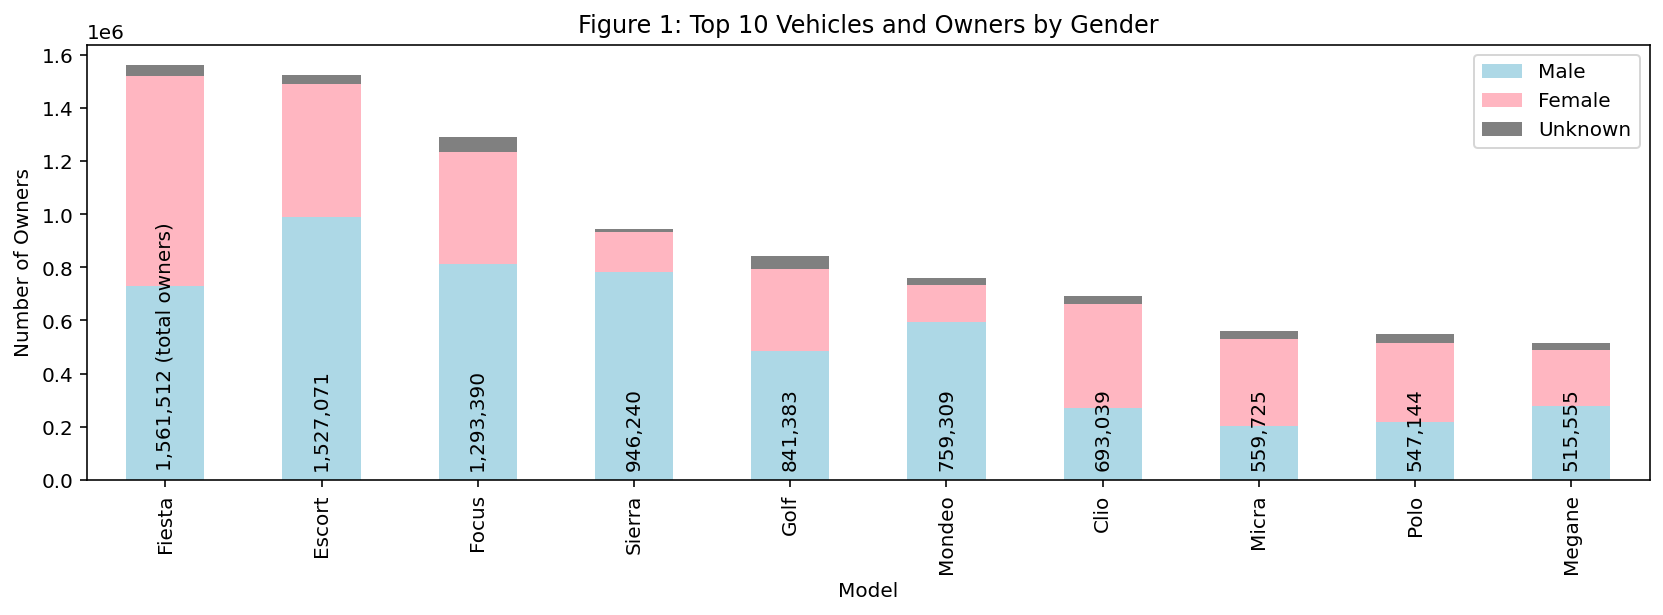

In [34]:
fig = plt.figure(figsize=(14,4))
ax = plt.gca()

dfTask2_1.plot(kind='bar', stacked=True, color=['lightblue','lightpink','grey'], ax=ax)
plt.title("Figure 1: Top 10 Vehicles and Owners by Gender")
plt.xlabel("Model")
plt.ylabel("Number of Owners")
plt.xticks(np.arange(10), list(dfTask2_1['Model']))

for i in range(dfTask2_1_total.shape[0]):
    if i == 0:
        plt.text(i, 5e4, '{:,}'.format(int(dfTask2_1_total.iloc[i])) + ' (total owners)', rotation='vertical', ha='center')
    else:
        plt.text(i, 5e4, '{:,}'.format(int(dfTask2_1_total.iloc[i])), rotation='vertical', ha='center')

plt.show()

## Task 2.2 

Let's go ahead and plot the Price and Power columns and inspect any errors.

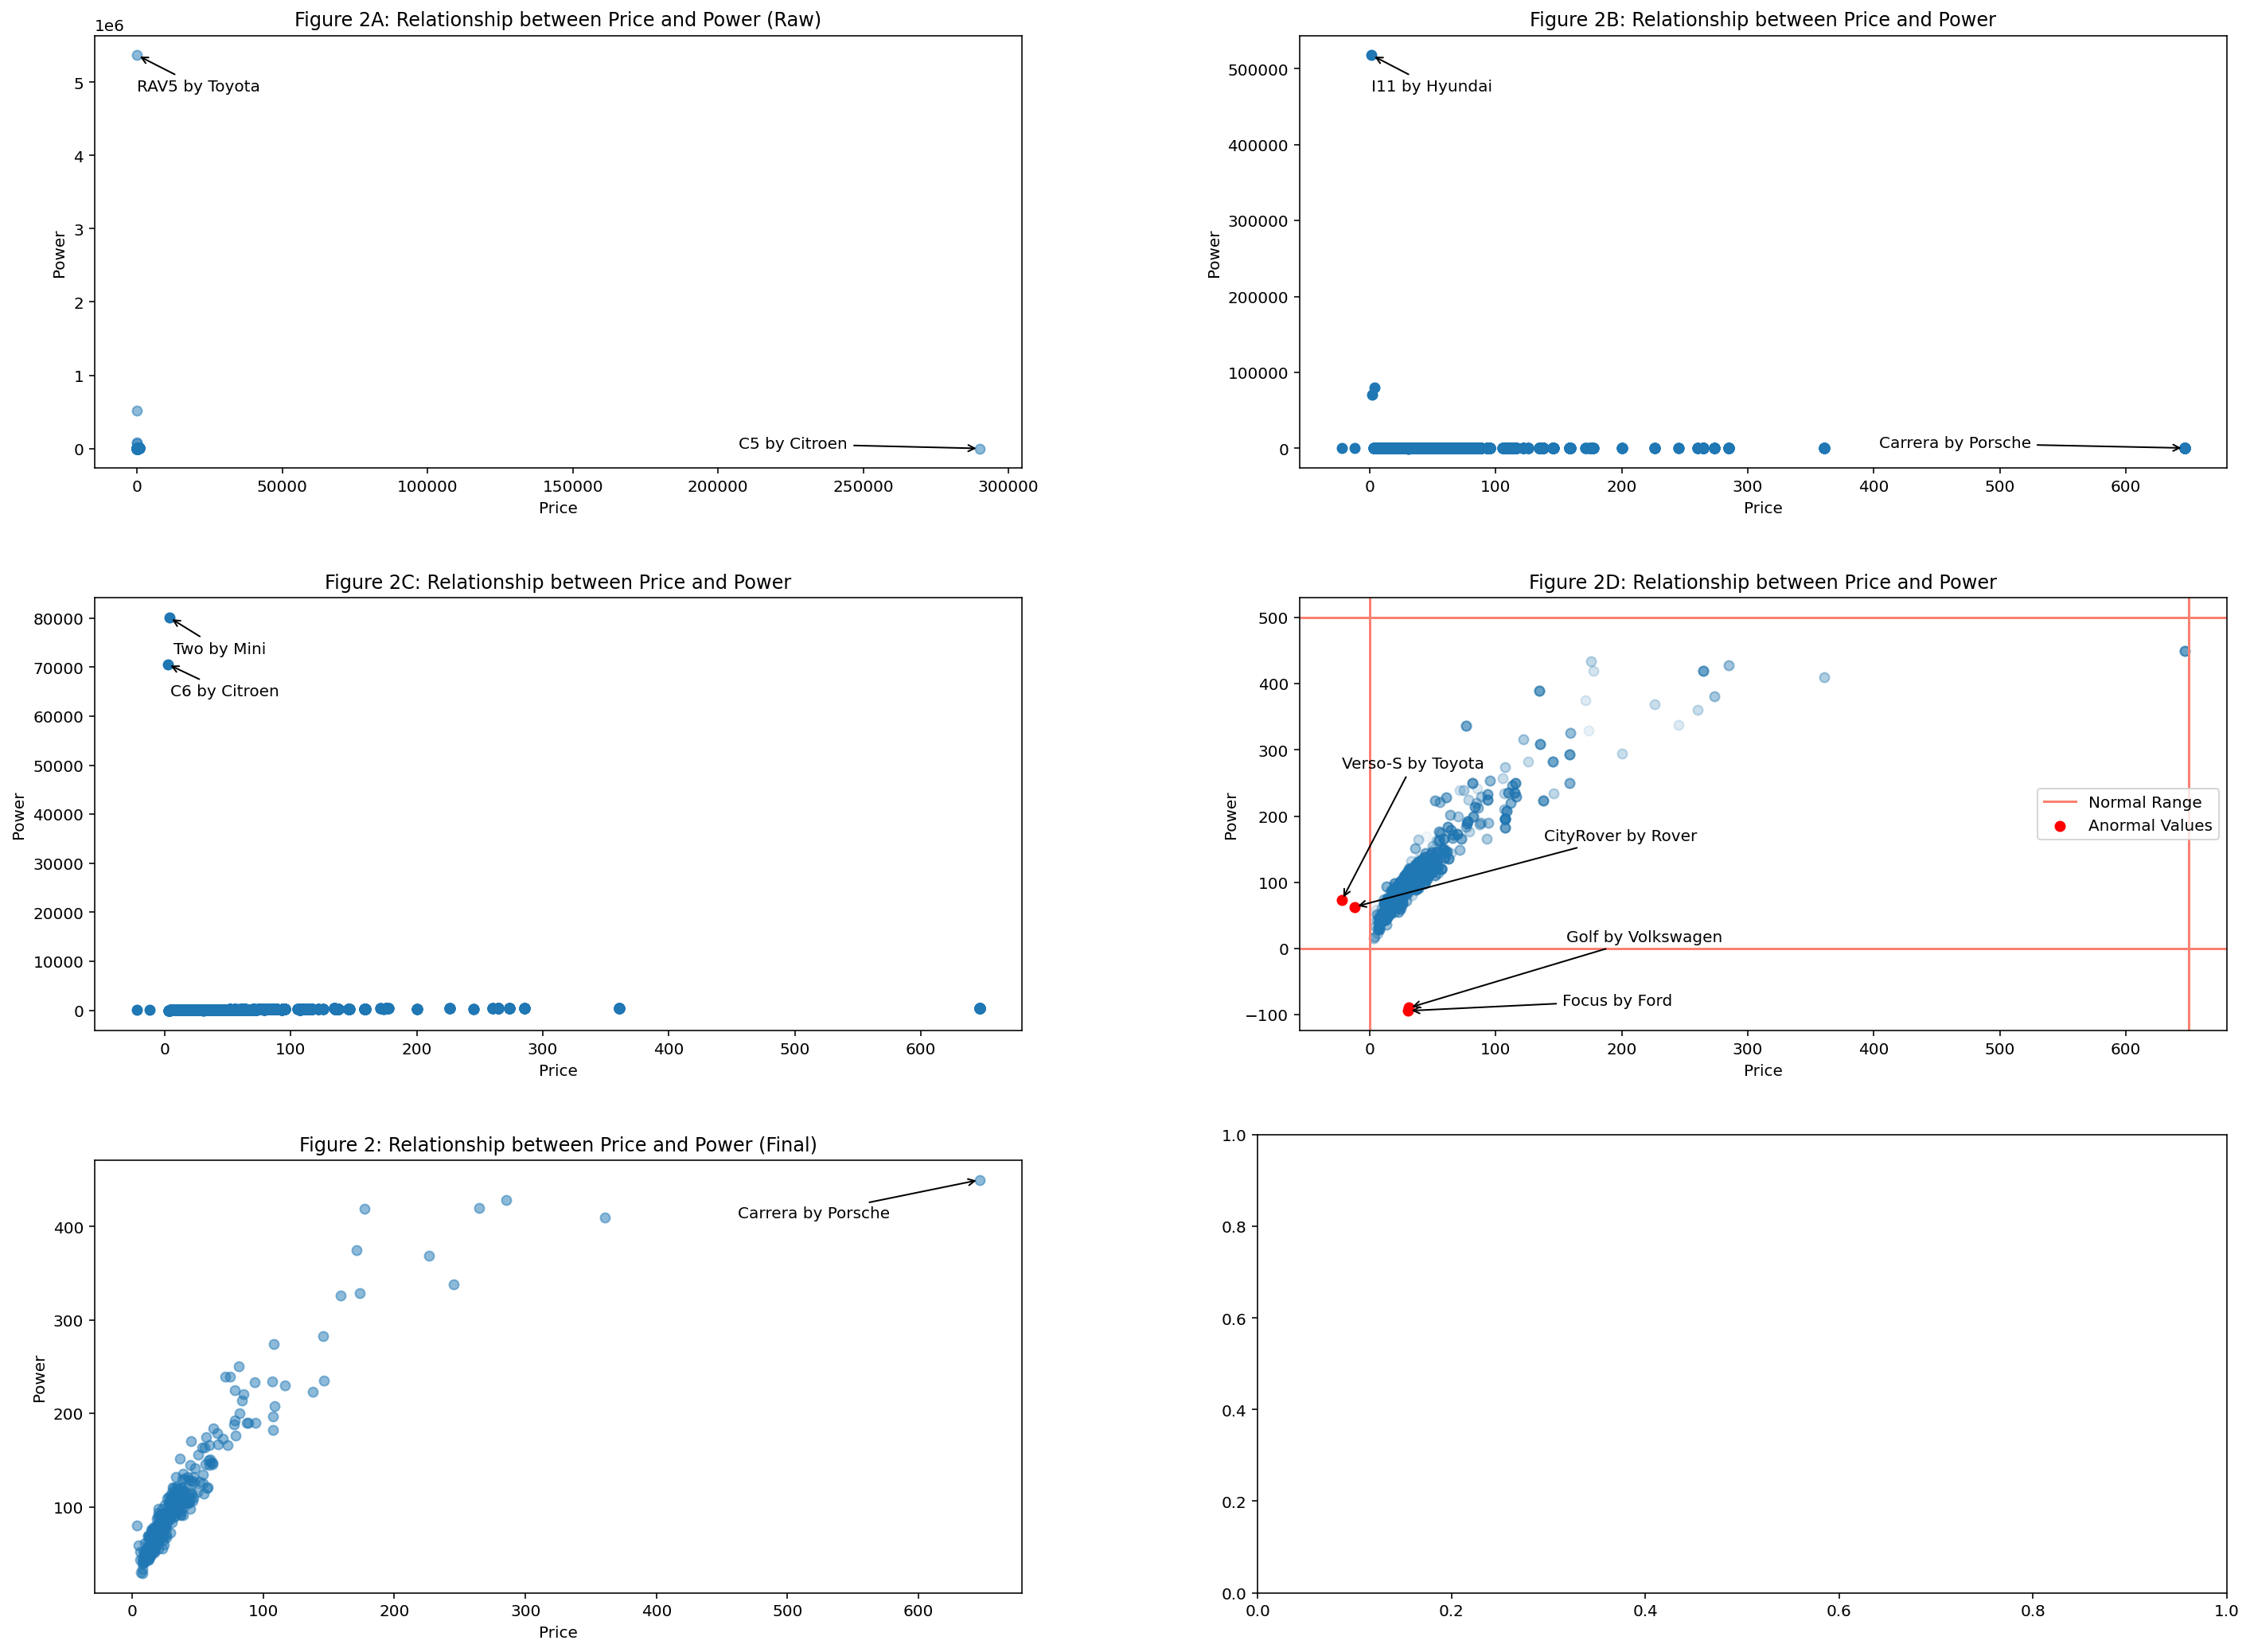

In [35]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize=(24,18))
grid = plt.GridSpec(3, 2, wspace=0.3, hspace=0.3)

plt.subplot(grid[2,0])
plt.scatter(df['Price'], df['Power'], alpha=0.5)
plt.title('Figure 2: Relationship between Price and Power (Final)')
plt.xlabel('Price')
plt.ylabel('Power')
outlier = df[df['Price'] > 600]
outlier = outlier.reset_index(drop=True)
plt.annotate(outlier.loc[0, 'Model'] + ' by ' + outlier.loc[0, 'Manufacturer'],
             xy=(outlier['Price'], outlier['Power']),
             xytext=(outlier['Price'] / 1.4, outlier['Power'] / 1.1),
             arrowprops=dict(arrowstyle='->'))

# Merge these four csv files
power = pd.read_csv("Power.csv", index_col=0)
price = pd.read_csv("Price.csv", index_col=0)
model = pd.read_csv("Model.csv", index_col=0)
manufacturer = pd.read_csv("Manufacturer.csv", index_col=0)

dfTask2_2 = power.merge(price, left_index=True, right_index=True)
dfTask2_2 = dfTask2_2.merge(model, left_index=True, right_index=True)
dfTask2_2 = dfTask2_2.merge(manufacturer, left_index=True, right_index=True)
dfTask2_2.dropna(inplace=True)

plt.subplot(grid[0, 0])
plt.scatter(dfTask2_2['Price'], dfTask2_2['Power'], alpha=0.5)
plt.title('Figure 2A: Relationship between Price and Power (Raw)')
plt.xlabel('Price')
plt.ylabel('Power')


# power_outliers = power[power > 250000]

# # plt.annotate(model[power_outliers.index[0]] + ' by ' + manufacturer[power_outliers.index[0]], xy=(price[power_outliers.index[0]], power[power_outliers.index[0]]), xytext=(price[power_outliers.index[0]], power[power_outliers.index[0]]), arrowprops=dict(arrowstyle='->', color='black') )
power_anomaly = dfTask2_2[dfTask2_2['Power'] > 5e6].iloc[0]
price_anomaly = dfTask2_2[dfTask2_2['Price'] > 2e5].iloc[0]
plt.annotate(str(power_anomaly['Model']) + ' by ' + str(power_anomaly['Manufacturer']),
             xy=(power_anomaly['Price'], power_anomaly['Power']),
             xytext=(power_anomaly['Price'] / 1.1, power_anomaly['Power'] / 1.1),
             arrowprops=dict(arrowstyle='->'))
plt.annotate(str(price_anomaly['Model']) + ' by ' + str(price_anomaly['Manufacturer']),
             xy=(price_anomaly['Price'], price_anomaly['Power']),
             xytext=(price_anomaly['Price'] / 1.4, price_anomaly['Power'] / 1.5),
             arrowprops=dict(arrowstyle='->'))

plt.subplot(grid[0,1])
dfTask2_2 = dfTask2_2[(dfTask2_2['Power'] < 5e6) & (dfTask2_2['Price'] < 2e5)]
plt.scatter(dfTask2_2['Price'], dfTask2_2['Power'])
plt.title('Figure 2B: Relationship between Price and Power')
plt.xlabel('Price')
plt.ylabel('Power')

power_anomaly = dfTask2_2[dfTask2_2['Power'] > 5e5].iloc[0]
price_anomaly = dfTask2_2[dfTask2_2['Price'] > 600].iloc[0]
plt.annotate(str(power_anomaly['Model']) + ' by ' + str(power_anomaly['Manufacturer']),
             xy=(power_anomaly['Price'], power_anomaly['Power']),
             xytext=(power_anomaly['Price'] / 1.1, power_anomaly['Power'] / 1.1),
             arrowprops=dict(arrowstyle='->'))
plt.annotate(str(price_anomaly['Model']) + ' by ' + str(price_anomaly['Manufacturer']),
             xy=(price_anomaly['Price'], price_anomaly['Power']),
             xytext=(price_anomaly['Price'] / 1.6, price_anomaly['Power'] / 0.5),
             arrowprops=dict(arrowstyle='->'))

plt.subplot(grid[1,0])
dfTask2_2 = dfTask2_2[(dfTask2_2['Power'] < 5e5)]
plt.scatter(dfTask2_2['Price'], dfTask2_2['Power'])
plt.title('Figure 2C: Relationship between Price and Power')
plt.xlabel('Price')
plt.ylabel('Power')

power_anomaly = dfTask2_2[dfTask2_2['Power'] > 7e4]

plt.annotate(str(power_anomaly['Model'].iloc[0]) + ' by ' + str(power_anomaly['Manufacturer'].iloc[0]),
             xy=(power_anomaly['Price'].iloc[0], power_anomaly['Power'].iloc[0]),
             xytext=(power_anomaly['Price'].iloc[0] / 0.5, power_anomaly['Power'].iloc[0] / 1.1),
             arrowprops=dict(arrowstyle='->'))
plt.annotate(power_anomaly['Model'].iloc[1] + ' by ' + str(power_anomaly['Manufacturer'].iloc[1]),
             xy=(power_anomaly['Price'].iloc[1], power_anomaly['Power'].iloc[1]),
             xytext=(power_anomaly['Price'].iloc[1] / 0.5, power_anomaly['Power'].iloc[1] / 1.1),
             arrowprops=dict(arrowstyle='->'))

plt.subplot(grid[1,1])
dfTask2_2 = dfTask2_2[(dfTask2_2['Power'] < 7e4)]
dfTask2_2_final = dfTask2_2[(dfTask2_2['Price'] > 0) &
                                      (dfTask2_2['Price'] <= 650) &
                                      (dfTask2_2['Power'] > 0) &
                                      (dfTask2_2['Power'] <= 500)]
dfTask2_2_final_anomalies = dfTask2_2[(dfTask2_2['Price'] <= 0) |
                                      (dfTask2_2['Price'] > 650) |
                                      (dfTask2_2['Power'] <= 0) |
                                      (dfTask2_2['Power'] > 500)]
plt.scatter(dfTask2_2_final['Price'], dfTask2_2_final['Power'], alpha=0.05)
plt.scatter(dfTask2_2_final_anomalies['Price'], dfTask2_2_final_anomalies['Power'], c='red', label='Anormal Values')

dfTask2_2_final_anomalies_power = dfTask2_2_final_anomalies[(dfTask2_2_final_anomalies['Power'] <= 0) |
                                                            (dfTask2_2_final_anomalies['Power'] > 500)]
dfTask2_2_final_anomalies_price = dfTask2_2_final_anomalies[(dfTask2_2_final_anomalies['Price'] <= 0) |
                                                            (dfTask2_2_final_anomalies['Price'] > 650)]

plt.annotate(dfTask2_2_final_anomalies_power['Model'].iloc[0] + ' by ' + dfTask2_2_final_anomalies_power['Manufacturer'].iloc[0],
             xy=(dfTask2_2_final_anomalies_power['Price'].iloc[0], dfTask2_2_final_anomalies_power['Power'].iloc[0]),
             xytext=(dfTask2_2_final_anomalies_power['Price'].iloc[0] * 5, dfTask2_2_final_anomalies_power['Power'].iloc[0] / 1.1),
             arrowprops=dict(arrowstyle='->'))
plt.annotate(dfTask2_2_final_anomalies_power['Model'].iloc[1] + ' by ' + dfTask2_2_final_anomalies_power['Manufacturer'].iloc[1],
             xy=(dfTask2_2_final_anomalies_power['Price'].iloc[1], dfTask2_2_final_anomalies_power['Power'].iloc[1]),
             xytext=(dfTask2_2_final_anomalies_power['Price'].iloc[1] * 5, dfTask2_2_final_anomalies_power['Power'].iloc[1] + 100),
             arrowprops=dict(arrowstyle='->'))

plt.annotate(dfTask2_2_final_anomalies_price['Model'].iloc[0] + ' by ' + dfTask2_2_final_anomalies_price['Manufacturer'].iloc[0],
             xy=(dfTask2_2_final_anomalies_price['Price'].iloc[0], dfTask2_2_final_anomalies_price['Power'].iloc[0]),
             xytext=(dfTask2_2_final_anomalies_price['Price'].iloc[0] + 150, dfTask2_2_final_anomalies_price['Power'].iloc[0] + 100),
             arrowprops=dict(arrowstyle='->'))

plt.annotate(dfTask2_2_final_anomalies_price['Model'].iloc[1] + ' by ' + dfTask2_2_final_anomalies_price['Manufacturer'].iloc[1],
             xy=(dfTask2_2_final_anomalies_price['Price'].iloc[1], dfTask2_2_final_anomalies_price['Power'].iloc[1]),
             xytext=(dfTask2_2_final_anomalies_price['Price'].iloc[1], dfTask2_2_final_anomalies_price['Power'].iloc[1] + 200),
             arrowprops=dict(arrowstyle='->'))

plt.title('Figure 2D: Relationship between Price and Power')
plt.xlabel('Price')
plt.ylabel('Power')
plt.axvline(0, c='salmon', label='Normal Range')
plt.axvline(650, c='salmon')
plt.axhline(0, c='salmon')
plt.axhline(500, c='salmon')
plt.legend(loc='center right')

plt.show()


## Task 2.3 

Even though the task never mentions female owners, we must take them into account to truly understand the relative relationship between male owners and other attributes. Therefore, in all following plots, we will include corresponding data about female owners to give a complete picture.

We can start off with this basic question: what vehicle manufacturers are most popular among men compared to women? To answer this question, we will compare the percentages of male and female owners per each manufacturer. 

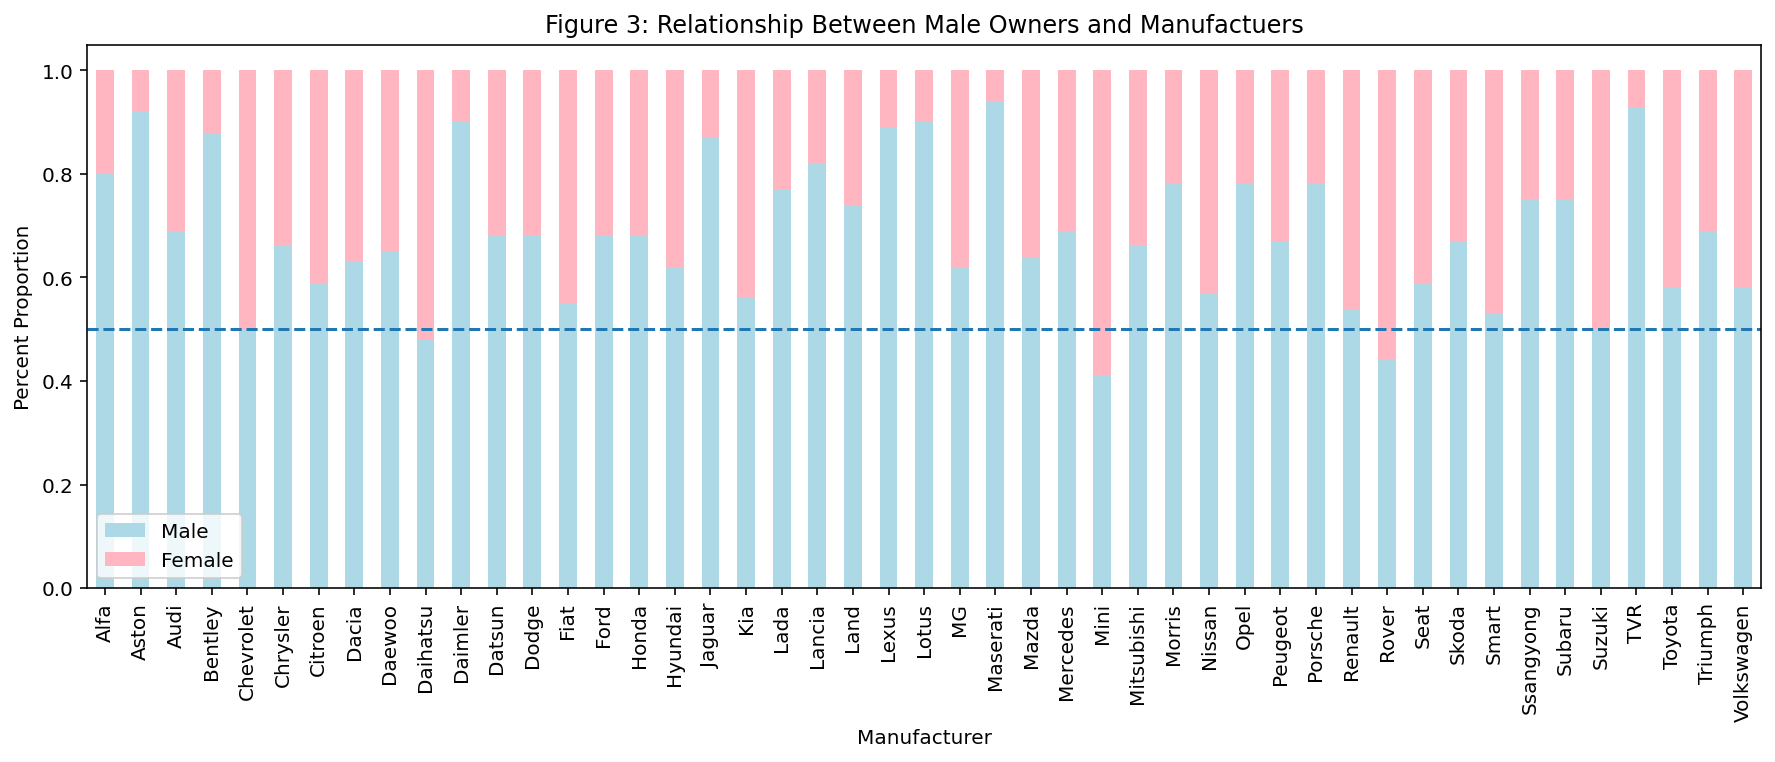

In [36]:
dfTask2_3 = df.reset_index(drop=True)
dfGroupedByManufacturer = dfTask2_3.groupby('Manufacturer')[['Male','Female']].sum()
dfGroupedByManufacturer['Total'] = dfGroupedByManufacturer['Male'] + dfGroupedByManufacturer['Female']
dfGroupedByManufacturer['Male'] = (dfGroupedByManufacturer['Male'] / dfGroupedByManufacturer['Total']).round(2)
dfGroupedByManufacturer['Female'] = (dfGroupedByManufacturer['Female'] / dfGroupedByManufacturer['Total']).round(2)
dfGroupedByManufacturer.drop('Total', axis=1, inplace=True)

fig = plt.figure(figsize=(15,5))
ax = plt.gca()
dfGroupedByManufacturer.plot(kind='bar', stacked=True, color=['lightblue','lightpink'], ax=ax)
plt.ylabel('Percent Proportion')
plt.title('Figure 3: Relationship Between Male Owners and Manufactuers')
plt.axhline(0.5, linestyle='--')
plt.show()


As we can see above, it comes as little surprise that certain manufacturers like Mini, Daihatsu, and Rover have proportionally larger attraction from female owners than male counterparts, given the looks of their line of models. On the other hand, we can see the males’ overwhelming preference for luxury car brands such as Alfa, Aston, Bentley, Daimler, Jaguar, Lexus, Lotus, Maserati, and TVR. 

Now, we move onto finding about the relationship between the male owners and each of these columns: Engine CC and Price.

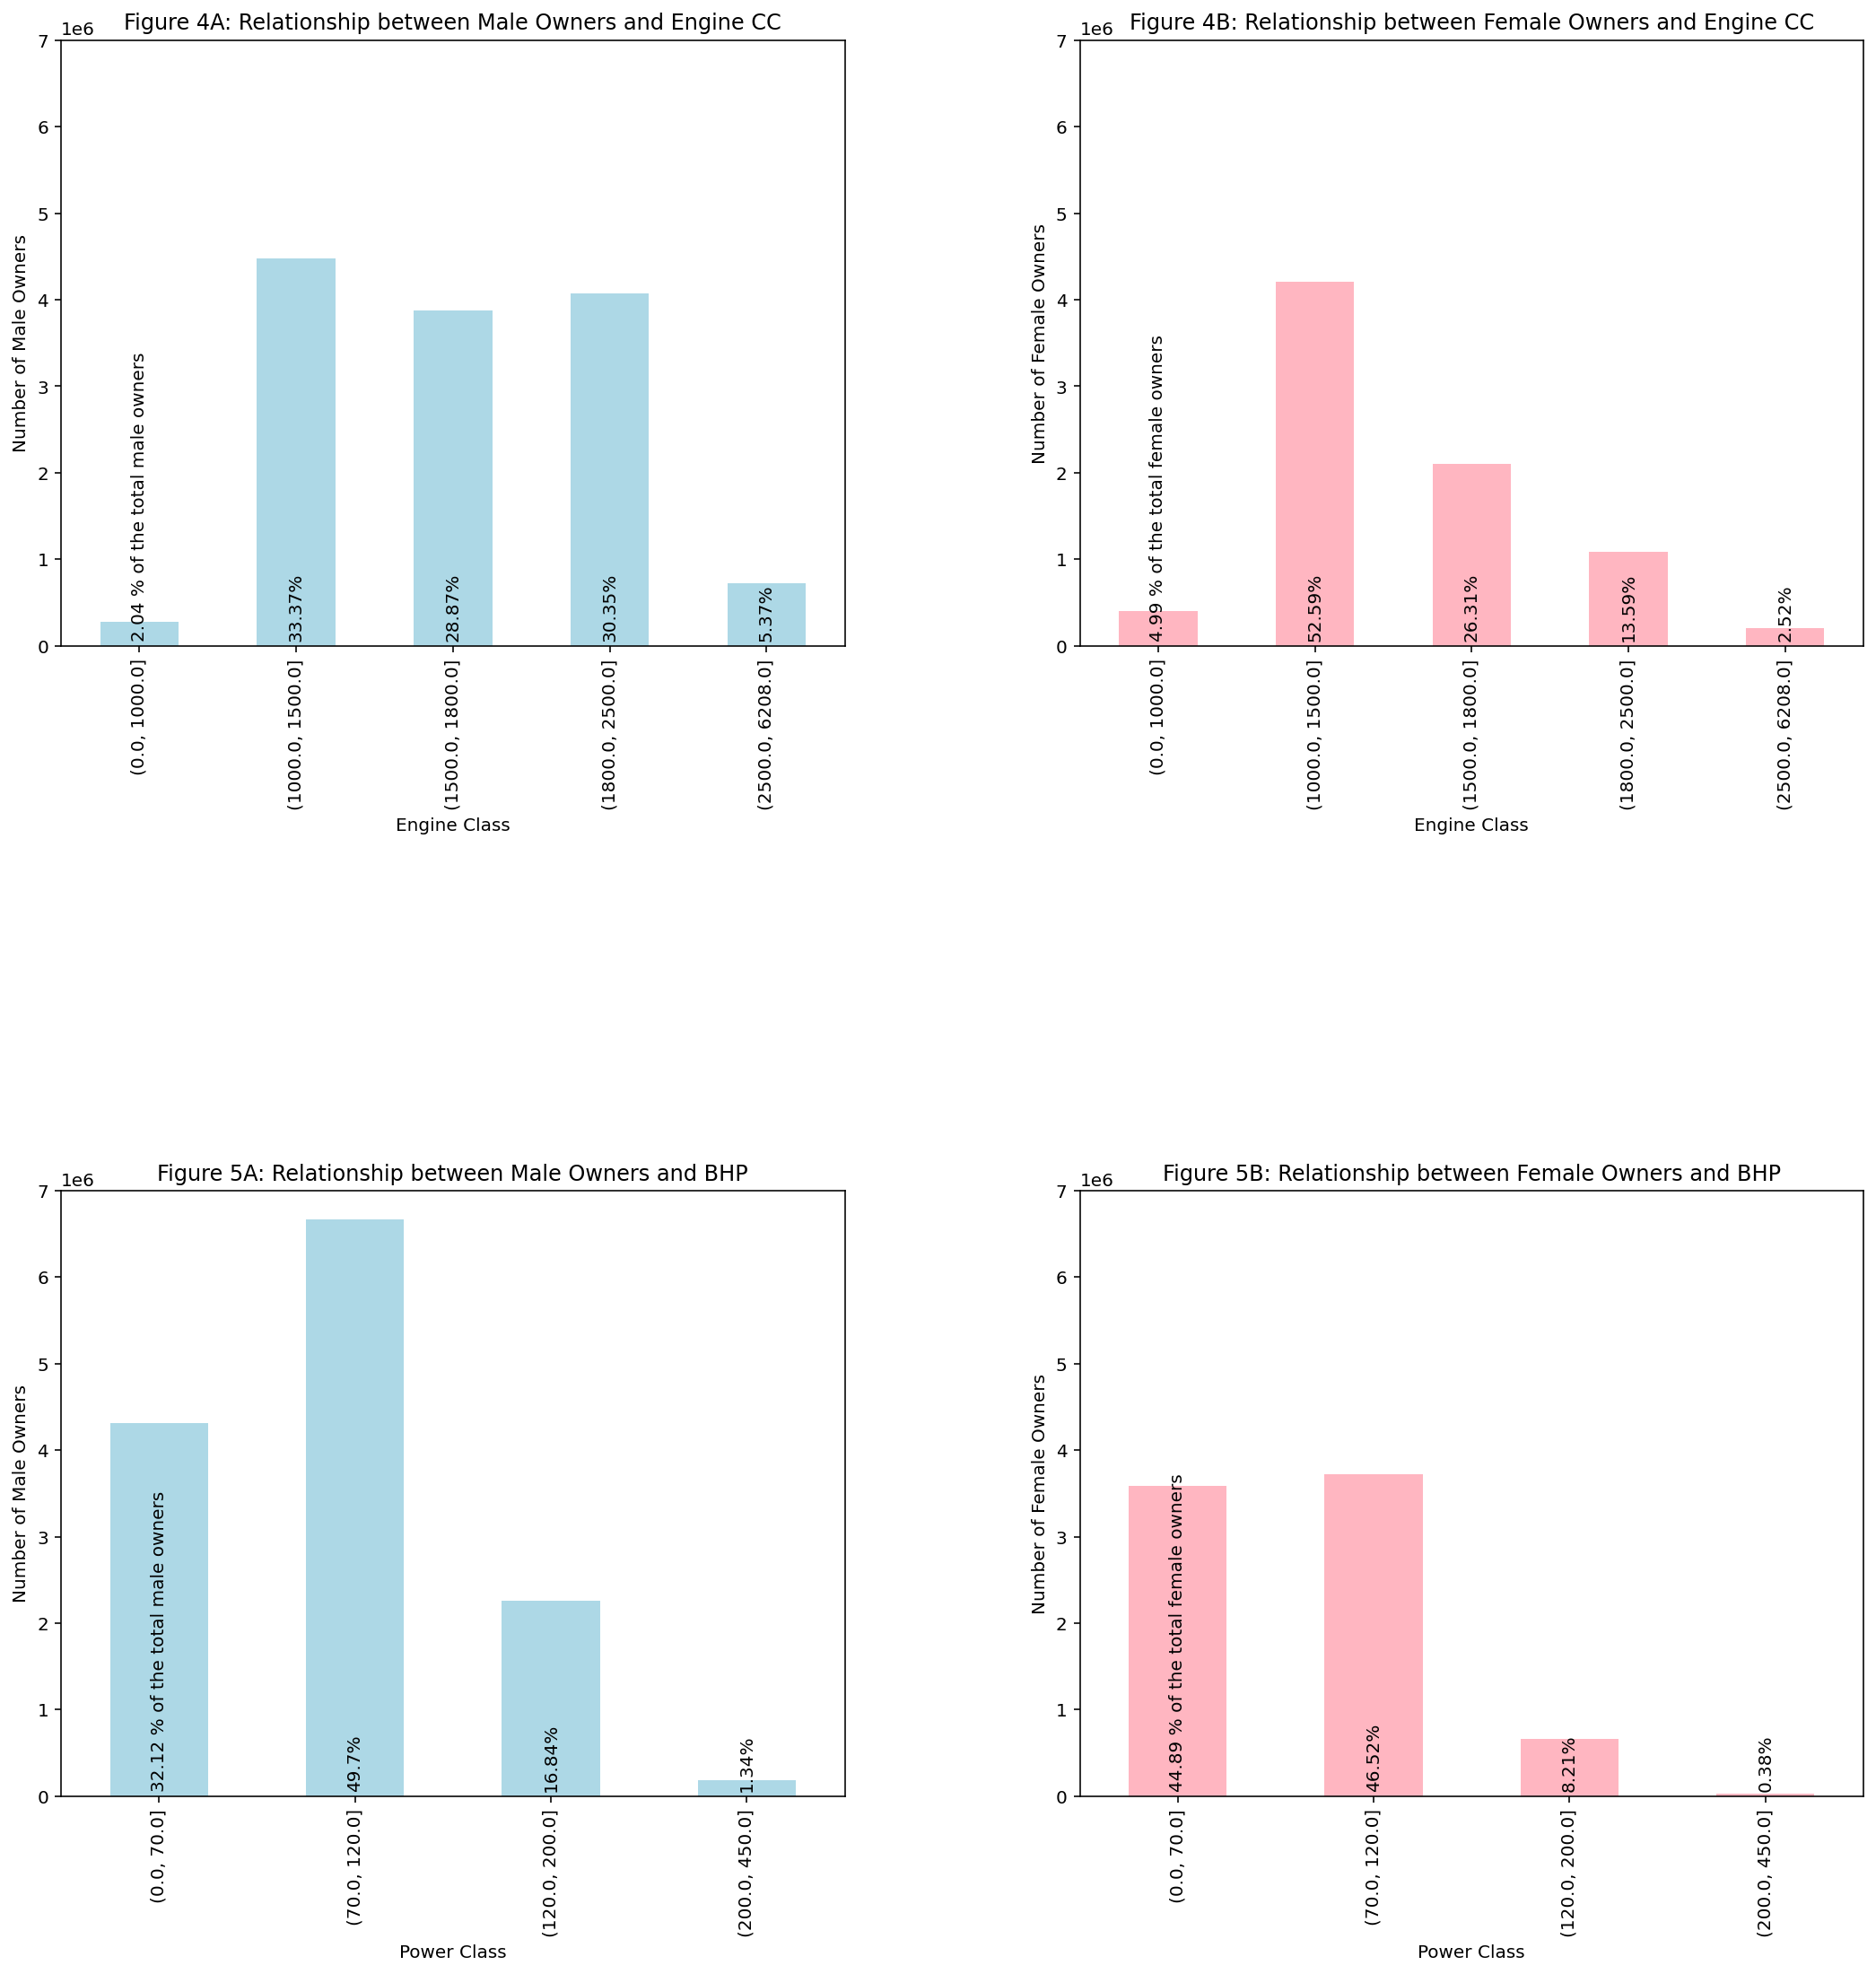

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,18))
grid =plt.GridSpec(2,2,wspace=0.3,hspace=0.9)
plt.subplot(grid[0,0])

dfTask2_3['EngineBins'] = pd.cut(dfTask2_3['Engine CC'], bins=[0,1000,1500,1800,2500, df['Engine CC'].max()])
dfTask2_3_total_male = dfTask2_3.groupby('EngineBins')['Male'].sum()
dfTask2_3_total_male.plot(kind='bar', color=['lightblue'], ylim=[0, 7e6], title='Figure 4A: Relationship between Male Owners and Engine CC', xlabel='Engine Class', ylabel='Number of Male Owners')
male_sum = dfTask2_3_total_male.sum()


for i in range(dfTask2_3_total_male.shape[0]):
    if i == 0:
        plt.text(i, 1e5, str((dfTask2_3_total_male.iloc[i] / male_sum * 100).round(2)) + ' % of the total male owners', rotation='vertical', ha='center')
#         plt.text(i, 5e4, '{:.2f}'.format(dfTask2_3_total.iloc[i, 1] / female_sum) + ' % of the total female owners', rotation='vertical', ha='center')
    else:
        plt.text(i, 1e5, str((dfTask2_3_total_male.iloc[i] / male_sum * 100).round(2)) + '%', rotation='vertical', ha='center')
        
plt.subplot(grid[0, 1])        
dfTask2_3_total_female = dfTask2_3.groupby('EngineBins')['Female'].sum()
dfTask2_3_total_female.plot(kind='bar', color=['lightpink'], ylim=[0, 7e6], title='Figure 4B: Relationship between Female Owners and Engine CC', xlabel='Engine Class', ylabel='Number of Female Owners')
female_sum = dfTask2_3_total_female.sum()


for i in range(dfTask2_3_total_female.shape[0]):
    if i == 0:
        plt.text(i, 1e5, str((dfTask2_3_total_female.iloc[i] / female_sum * 100).round(2)) + ' % of the total female owners', rotation='vertical', ha='center')
#         plt.text(i, 5e4, '{:.2f}'.format(dfTask2_3_total.iloc[i, 1] / female_sum) + ' % of the total female owners', rotation='vertical', ha='center')
    else:
        plt.text(i, 1e5, str((dfTask2_3_total_female.iloc[i] / female_sum * 100).round(2)) + '%', rotation='vertical', ha='center')        
        
plt.subplot(grid[1,0])
dfTask2_3['PowerBins'] = pd.cut(dfTask2_3['Power'], bins=[0, 70, 120, 200, df['Power'].max()])
dfTask2_3_total_male_power = dfTask2_3.groupby('PowerBins')['Male'].sum()
dfTask2_3_total_male_power.plot(kind='bar', color=['lightblue'], ylim=[0, 7e6] , title='Figure 5A: Relationship between Male Owners and BHP', xlabel='Power Class', ylabel='Number of Male Owners')
male_sum_power = dfTask2_3_total_male_power.sum()

for i in range(dfTask2_3_total_male_power.shape[0]):
    if i == 0:
        plt.text(i, 1e5, str((dfTask2_3_total_male_power.iloc[i] / male_sum_power * 100).round(2)) + ' % of the total male owners', rotation='vertical', ha='center')
    else:
        plt.text(i, 1e5, str((dfTask2_3_total_male_power.iloc[i] / male_sum_power * 100).round(2)) + '%', rotation='vertical', ha='center')
        
plt.subplot(grid[1,1])
dfTask2_3_total_female_power = dfTask2_3.groupby('PowerBins')['Female'].sum()
dfTask2_3_total_female_power.plot(kind='bar', color=['lightpink'], ylim=[0, 7e6], title='Figure 5B: Relationship between Female Owners and BHP', xlabel='Power Class', ylabel='Number of Female Owners')
female_sum_power = dfTask2_3_total_female_power.sum()

for i in range(dfTask2_3_total_female_power.shape[0]):
    if i == 0:
        plt.text(i, 1e5, str((dfTask2_3_total_female_power.iloc[i] / female_sum_power * 100).round(2)) + ' % of the total female owners', rotation='vertical', ha='center')
    else:
        plt.text(i, 1e5, str((dfTask2_3_total_female_power.iloc[i] / female_sum_power * 100).round(2)) + '%', rotation='vertical', ha='center')

Engine capacities can be classified into 5 categories ("Engine Capacity (CC): Engine Volume", 2022):
1.	Up to 1000cc (Small Cars and Hatchbacks)
2.	1000cc to 1500cc (Family Cars)
3.	1500cc to 1800cc (Mid-size Cars and Small Wagons)
4.	 1800cc to 2500cc (Semi-luxury Cars, Wagons, MPVs and SUVs)
5.	Above 2500cc (SUVs, Sports Cars, High-end Luxury Cars)


We could see in the graph above that 64.59% of the male owners own vehicles with the engine capacity equal to or greater than 1500cc, whereas 57.58% of the female owners own either small vehicles or family cars. It is reasonable to conclude men lean to owning vehicles with large engines than women do. 

As with the previous relationship, the Power column can be binned into 4 classes ("What is a good BHP for a car?", 2022):
1.	Up to 70bhp (Smaller Car)
2.	70bhp to 120bhp (Average Car)
3.	120bhp to 200bhp (Larger SUV)
4.	Above 200bhp (Sports and Luxury Car)


The graphs above support the finding in the previous relationship. Men who own vehicles with a powerful engine outnumber female counterparts not only in absolute numbers, but in proportion within their respective populations. In summary, being male has a higher correlation with owning greater-bhp vehicles.

In [38]:
df.to_csv('../cleaned_car_buyers.csv')